<p align="center"> 
    <span style="font-family: SF Pro Display; font-size:24px; font-weight: Bold;">Disney + Hotstar Content Exploratory Data Analysis.</span><br>
    <img src="https://raw.githubusercontent.com/Subhrajit91939/Handwashing-Data-Analysis/master/Disney%2BHotstar.jpg" alt="Disney+Hotstar Logo">
 </p>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disney-hotstar-dataset/disney_plus_shows.csv


<span style="font-family: SF Pro Display; font-size:20px; font-weight: Bold;">1. Importing all the necessary Libraries.</span> <br>

In [2]:
# Data analysis and wrangling.
import pandas as pd
import numpy as np

# Data Visualization:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Default fonts
mpl.rcParams['font.family'] = 'SF Pro Display'

# Suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
disney = pd.read_csv('../input/disney-hotstar-dataset/disney_plus_shows.csv')
disney.shape

(992, 19)

In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

In [5]:
disney.sample(5)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"November 12, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,tt0368933,The Princess Diaries 2: Royal Engagement,"Now settled in Genovia, Princess Mia faces a n...",movie,G,2004,11 Aug 2004,"November 12, 2019",113 min,"Comedy, Family, Romance",Garry Marshall,"Meg Cabot (characters), Gina Wendkos (story), ...","Anne Hathaway, Julie Andrews, Hector Elizondo,...","English, Greek, French, Spanish",USA,1 win & 2 nominations.,43.0,5.8,"70,904"
915,tt0096273,Tin Toy,A tin one-man-band toy tries to escape a destr...,movie,G,1988,30 Dec 1988,"November 12, 2019",5 min,"Animation, Short, Family, Fantasy",John Lasseter,John Lasseter (story),"Mel Blanc, Rob Paulsen",English,USA,Won 1 Oscar. Another 3 wins.,NaN,6.5,"9,253"
251,tt7008868,Earth Live,Jane Lynch and Phil Keoghan take viewers on a ...,movie,NaN,2017,09 Jul 2017,"November 12, 2019",NaN,Documentary,Glenn Weiss,"Lewis Friedman, Ann Slichter, Grant Taylor","Jane Lynch, Phil Keoghan",English,USA,NaN,NaN,5.6,24
649,tt0078158,Return from Witch Mountain,"Tia and Tony visit Los Angeles, but he's quick...",movie,G,1978,10 Mar 1978,"November 12, 2019",95 min,"Family, Adventure, Sci-Fi, Fantasy",John Hough,"Malcolm Marmorstein, Alexander Key (characters)","Bette Davis, Christopher Lee, Kim Richards, Ik...",English,USA,NaN,51.0,5.9,"4,201"


In [6]:
# Checking all the columns for any duplicates:

print(f"\nDisney+Hotstar dataset has: {disney.duplicated().sum()} Duplicate values")


Disney+Hotstar dataset has: 74 Duplicate values


<span style="font-family: SF Pro Display; font-size:18px; font-weight: Regular;">we have a total of <strong>74 duplicates</strong> in the disney dataset.</span>

In [7]:
# Displaying all the columns with NaN values and the Percentage of NaN/NULL values:
nan_count = 0
for i in disney.columns:
    nan_perc = disney[i].isna().sum() / len(disney) * 100 
    if nan_perc > 0 :
        print(f"{i}'s NaN value = {nan_perc:.2f}%")
        nan_count += 1

print(f"\nTotal columns with NaN/NULL values: {nan_count} columns")

imdb_id's NaN value = 9.88%
title's NaN value = 9.88%
plot's NaN value = 12.70%
type's NaN value = 9.88%
rated's NaN value = 25.20%
year's NaN value = 9.88%
released_at's NaN value = 11.90%
runtime's NaN value = 15.52%
genre's NaN value = 10.79%
director's NaN value = 30.54%
writer's NaN value = 25.10%
actors's NaN value = 12.30%
language's NaN value = 12.80%
country's NaN value = 12.40%
awards's NaN value = 43.95%
metascore's NaN value = 70.56%
imdb_rating's NaN value = 11.39%
imdb_votes's NaN value = 11.39%

Total columns with NaN/NULL values: 18 columns


<span style="font-family: SF Pro Display; font-size:18px; font-weight: Regular;"> Dataset contains a total of <strong>19 columns</strong>, out of which <strong>18 columns</strong> contain <strong>missing/NaN values</strong> and need cleaning.</span>
* <span style="font-family: SF Pro Display; font-size:15px; font-weight: Regular;"> <strong>~9.88%</strong> of the rows in all the columns (Except <code>added_at</code> column) has <strong>NaN/NULL values</strong>, so we can saely drop that part from our dataframe.</span>
* <span style="font-family: SF Pro Display; font-size:15px; font-weight: Regular;"><code>metascore</code> column has the most number of missing values <strong>~70.56%</strong>. It would be safe to drop the <code>metascore</code> column from the dataframe. As we already have 2 features when it comes to ratings for all the content available on the platform.</span>

<span style="font-family: SF Pro Display; font-size:18px; font-weight: Regular;">Now, let us have a look at the <strong>Disney+</strong> data.</span>

In [8]:
disney.describe(include='all').head(4)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
count,894,894,866,894,742,894,874,992,838,885,689,743,870,865,869,556,292.0,879.0,879
unique,894,872,865,3,17,178,800,58,128,366,465,710,817,72,59,258,NaN,NaN,818
top,tt0147800,Freaky Friday,The romantic tale of a sheltered uptown Cocker...,movie,G,2019,12 Nov 2019,"November 12, 2019",30 min,Documentary,Jack Hannah,"Bill Berg (story), Nick George (story)",Winston Hibler,English,USA,1 nomination.,NaN,NaN,47
freq,1,3,2,680,207,31,12,786,52,53,16,4,10,737,735,56,NaN,NaN,3


<span style="font-family: SF Pro Display; font-size:18px; font-weight: Regular;">Cleaning the <strong>missing/NaN</strong> data.</span>
<br>
<span style="font-family: SF Pro Display; font-size:16px; font-weight: Regular;">1. Dropping the <code>metascore</code> feature from the dataset.</span><br>
<span style="font-family: SF Pro Display; font-size:16px; font-weight: Regular;">2. Dropping the <strong>~9.88%</strong> missing data from the dataset.</span>

In [9]:
disney = disney.drop(columns='metascore')

In [10]:
# dropping the 9.88% Missing data in the major columns.
disney = disney.dropna(subset=['imdb_id', 'title', 'type', 'year'])
disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 991
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     894 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  imdb_rating  879 non-null    float64
 17  imdb_votes   879 non-null    object 
dtypes: float64(1), object(17)
memory usage: 132.7+ KB


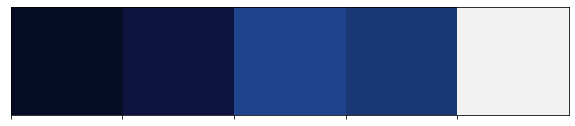

In [11]:
sns.palplot(['#070C26', '#0D1440', '#1F438C', '#193773', '#F2F2F2'], size=2)

In [12]:
# Top-10 Movies Based on IMDB Ratings:


<span style="font-family: SF Pro Display; font-size:24px; font-weight: Bold;"> References & Inspirations:</span><br>
<span style="font-family: SF Pro Display; font-size:18px; font-weight: Bold;">1. <a href="https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset/notebook">Awesome Visualization with Titanic Dataset by Subin An</a></span><br>
<span style="font-family: SF Pro Display; font-size:18px; font-weight: Bold;">2. <a href="https://www.kaggle.com/code/subinium/all-you-need-is-pandas-benchmark-viz">All you need is Pandas📊(Benchmark Viz) by Subin An</a></span><br>
<span style="font-family: SF Pro Display; font-size:18px; font-weight: Bold;">3. <a href="https://www.kaggle.com/code/subinium/storytelling-with-data-netflix-ver">🎬 Storytelling with Data - Netflix ver. by Subin An</a></span><br>
<span style="font-family: SF Pro Display; font-size:18px; font-weight: Bold;">4. <a href="https://www.kaggle.com/code/kalilurrahman/disney-content-eda-analysis">🔥Disney+ Content - EDA Analysis 💥🎯🎬 By Kalilur Rahman</a></span><br>
<span style="font-family: SF Pro Display; font-size:16px; font-weight: Bold;"><a href="https://2colors.colorion.co">Awesome color combos: Colorion</a></span>
